## Partie 1 : Nettoyage et Fusion des deux dataset



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chargement des données

data1 = pd.read_csv("2015-building-energy-benchmarking.csv", low_memory=False)
data2 = pd.read_csv("2016-building-energy-benchmarking.csv", low_memory=False)

<IPython.core.display.Javascript object>

In [3]:
# Liste des différentes colonnes du Data Set

list(data1.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'Location',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'DefaultData',
 'Comment',
 'ComplianceStatus',
 'Outlier',
 '2010 Census Tracts',

<IPython.core.display.Javascript object>

In [4]:
# Liste des différentes colonnes du Data Set

list(data2.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

<IPython.core.display.Javascript object>

In [5]:
# Grâce aux différentes colonnes deux deux datsets, nous pouvons modifié les colonnes qui ont des noms différents alors que
# ce sont les mêmes données. Et nous allons également supprimé les colonnes qui ne nous intéressent pas pour notre étude.

del data1["2010 Census Tracts"]
del data1["Seattle Police Department Micro Community Policing Plan Areas"]
del data1["City Council Districts"]
del data1["SPD Beats"]
del data1["Zip Codes"]
del data1["Location"]

del data2["Address"]
del data2["City"]
del data2["State"]
del data2["ZipCode"]
del data2["Latitude"]
del data2["Longitude"]

# J'ai décidé de ne pas prendre en compte les données de localisation que sont la longitude et la latitude. Dans un premier
# temps, j'ai préfére de garder que la variable Neighborhood, qui nous donne déjà une information sur la localisation
# du bâtiment

<IPython.core.display.Javascript object>

In [6]:
# Je change le nom des colonnes du deuxième dataset.

data2 = data2.rename(
    columns={
        "TotalGHGEmissions": "GHGEmissions(MetricTonsCO2e)",
        "GHGEmissionsIntensity": "GHGEmissionsIntensity(kgCO2e/ft2)",
    }
)

<IPython.core.display.Javascript object>

In [7]:
# Je fusionne les deux datasets pour n'en avoir plus qu'une seule.

data = pd.concat([data1, data2])

<IPython.core.display.Javascript object>

In [8]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,Comments
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,...,12724.000000,1.272388e+06,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,...,44490.000000,4.448985e+06,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,...,37099.000000,3.709900e+06,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,20019.000000,2.001894e+06,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,...,87631.000000,8.763105e+06,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,...,3254.750244,3.254750e+05,NaN,20.94,1.70,True,NaN,Error - Correct Default Data,NaN,NaN
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,...,5537.299805,5.537300e+05,NaN,32.17,2.01,False,NaN,Compliant,NaN,NaN
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,...,39737.390630,3.973739e+06,NaN,223.54,16.99,False,NaN,Compliant,NaN,NaN
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1.0,...,3706.010010,3.706010e+05,NaN,22.11,1.57,False,NaN,Compliant,NaN,NaN


<IPython.core.display.Javascript object>

In [9]:
# Comme nous avons fusionné les deux datasets, il est possible que certains bâtiments apparaissent deux fois.
# Nous allons alors calculé la moyenne sur les deux années. Ceci nous permettra de supprimer les potentiels doublons

mean_columns = [
    "NumberofBuildings",
    "NumberofFloors",
    "PropertyGFATotal",
    "PropertyGFAParking",
    "PropertyGFABuilding(s)",
    "LargestPropertyUseTypeGFA",
    "SecondLargestPropertyUseTypeGFA",
    "ThirdLargestPropertyUseTypeGFA",
    "ENERGYSTARScore",
    "SiteEUI(kBtu/sf)",
    "SiteEUIWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "SourceEUIWN(kBtu/sf)",
    "SiteEnergyUse(kBtu)",
    "SiteEnergyUseWN(kBtu)",
    "SteamUse(kBtu)",
    "Electricity(kWh)",
    "Electricity(kBtu)",
    "NaturalGas(therms)",
    "NaturalGas(kBtu)",
    "GHGEmissions(MetricTonsCO2e)",
    "GHGEmissionsIntensity(kgCO2e/ft2)",
]

OSEBuilding_means = (
    data[["OSEBuildingID"] + mean_columns].groupby("OSEBuildingID").mean()
)
OSEBuilding_means.head()

duplicate_building = data.drop_duplicates(subset=["OSEBuildingID"], keep="last")
duplicate_building.drop(mean_columns, axis=1, inplace=True)
data = pd.merge(duplicate_building, OSEBuilding_means, how="left", on="OSEBuildingID")

C:\Users\antoi\miniconda3\envs\Test\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<IPython.core.display.Javascript object>

In [10]:
%matplotlib inline

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

# Résumé des données brutes
data.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,OtherFuelUse(kBtu),Comments,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,3432.000000,3432.000000,3432.000000,3432.000000,55.000000,0.0,3431.000000,3432.000000,3.432000e+03,3432.000000,3.432000e+03,3.402000e+03,1704.000000,607.000000,2656.000000,3429.000000,3429.000000,3428.000000,3428.000000,3.429000e+03,3.429000e+03,3.428000e+03,3.428000e+03,3.428000e+03,3.428000e+03,3.428000e+03,3428.000000,3428.000000
mean,21184.746795,2015.983683,4.448135,1968.360140,3238.072727,NaN,1.087875,4.688228,9.447183e+04,9651.224068,8.482061e+04,7.921153e+04,28497.813467,11660.911531,68.116717,54.445859,57.489341,133.943174,138.589950,5.398222e+06,5.311222e+06,2.737963e+05,1.087418e+06,3.710342e+06,1.361560e+04,1.361560e+06,119.311982,1.092922
std,12211.835092,0.126710,2.119483,33.182901,24014.190061,NaN,1.992205,5.458473,2.172062e+05,32953.838541,2.048840e+05,2.011318e+05,54202.216986,29021.209831,26.377049,55.895447,57.157732,137.744473,137.275549,2.152855e+07,1.595773e+07,3.795683e+06,4.332754e+06,1.478348e+07,6.729292e+04,6.729292e+06,534.287074,1.769338
min,1.000000,2015.000000,1.000000,1900.000000,0.000000,NaN,0.500000,0.000000,1.128500e+04,-1.500000,-8.451000e+03,6.455000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.050000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.090000,0.000000
25%,19974.250000,2016.000000,3.000000,1948.000000,0.000000,NaN,1.000000,2.000000,2.846350e+04,0.000000,2.726825e+04,2.505300e+04,5000.000000,2275.500000,52.500000,27.850000,29.600000,74.287500,79.500000,9.293272e+05,9.898913e+05,0.000000e+00,1.859820e+05,6.345736e+05,0.000000e+00,0.000000e+00,9.568750,0.150000
50%,23109.500000,2016.000000,4.000000,1974.000000,0.000000,NaN,1.000000,4.000000,4.419500e+04,0.000000,4.213725e+04,3.986750e+04,10725.500000,5000.000000,75.500000,38.100001,40.650001,95.900000,101.599999,1.792235e+06,1.940694e+06,0.000000e+00,3.440100e+05,1.173787e+06,3.211758e+03,3.211605e+05,33.842500,0.545000
75%,25976.500000,2016.000000,7.000000,1997.000000,0.000000,NaN,1.000000,5.000000,9.044875e+04,2890.250000,8.192375e+04,7.557300e+04,26797.250000,10182.500000,89.625000,60.050000,64.750001,144.150000,149.900002,4.195498e+06,4.402542e+06,0.000000e+00,8.214296e+05,2.802775e+06,1.152796e+04,1.152789e+06,91.890000,1.290000
max,50226.000000,2016.000000,7.000000,2015.000000,178094.000000,NaN,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.314066e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


<IPython.core.display.Javascript object>

In [11]:
# Nous allons maintenant créer de nouvelles variables à partir de celles existantes.
# Je remplace la variable date de contruction par l'âge du bâtiment grâce à la date des relevés.
# Je crée aussi deux variables grâce aux surfaces des batiments. Le rapport entre la surface Bâtiment ou Parking et la surface
# totale. Grâce aux tableaux précédents, j'ai décidé de supprimé les données avec la surface des batiments négatives

data["BuildingAge"] = data["DataYear"] - data["YearBuilt"]
data = data[data["PropertyGFAParking"] >= 0]
data["GFABuilding"] = data["PropertyGFABuilding(s)"] / data["PropertyGFATotal"]
data["GFAParking"] = data["PropertyGFAParking"] / data["PropertyGFATotal"]

<IPython.core.display.Javascript object>

In [12]:
# Je supprime les variables qui contiennent WN. Ce sont les mêmes variables mais normalisées en fonction des conditions climatiques.


for c in data.columns:
    if c not in [
        "OSEBuildingID",
        "BuildingType",
        "PrimaryPropertyType",
        "CouncilDistrictCode",
        "Neighborhood",
        "NumberofBuildings",
        "NumberofFloors",
        "PropertyGFATotal",
        "ListOfAllPropertyUseTypes",
        "LargestPropertyUseType",
        "LargestPropertyUseTypeGFA",
        "SecondLargestPropertyUseType",
        "SecondLargestPropertyUseTypeGFA",
        "ThirdLargestPropertyUseType",
        "ThirdLargestPropertyUseTypeGFA",
        "YearsENERGYSTARCertified",
        "ENERGYSTARScore",
        "SiteEUI(kBtu/sf)",
        "SourceEUI(kBtu/sf)",
        "SiteEnergyUse(kBtu)",
        "SteamUse(kBtu)",
        "Electricity(kWh)",
        "NaturalGas(kBtu)",
        "OtherFuelUse(kBtu)",
        "GHGEmissions(MetricTonsCO2e)",
        "GHGEmissionsIntensity(kgCO2e/ft2)",
        "DefaultData",
        "Outlier",
        "GFABuilding",
        "GFAParking",
        "BuildingAge",
        "ComplianceStatus",
    ]:
        del data[c]

<IPython.core.display.Javascript object>

In [13]:
# Notre analyse devant être basé sur les bâtiments non résidentiels, nous allons maintenant supprimé les bâtiments de ce type

from collections import Counter


def most_common_words(labels):
    counter = Counter(labels)
    for word in counter.most_common(100):
        print(word)


most_common_words(data["BuildingType"].values)

('NonResidential', 1487)
('Multifamily LR (1-4)', 1040)
('Multifamily MR (5-9)', 583)
('Multifamily HR (10+)', 110)
('SPS-District K-12', 99)
('Nonresidential COS', 85)
('Campus', 25)
('Nonresidential WA', 1)


<IPython.core.display.Javascript object>

In [14]:
data = data[~data["BuildingType"].str.contains("Multifamily")]
most_common_words(data["BuildingType"].values)

('NonResidential', 1487)
('SPS-District K-12', 99)
('Nonresidential COS', 85)
('Campus', 25)
('Nonresidential WA', 1)


<IPython.core.display.Javascript object>

In [15]:
# Je réalise certain traitement sur les variables contenant des Nan

data["SecondLargestPropertyUseTypeGFA"] = data["SecondLargestPropertyUseTypeGFA"].fillna(0)
data["ThirdLargestPropertyUseTypeGFA"] = data["ThirdLargestPropertyUseTypeGFA"].fillna(0)
data["LargestPropertyUseTypeGFA"] = data["LargestPropertyUseTypeGFA"].fillna(0)
data["SecondLargestPropertyUseType"] = data["SecondLargestPropertyUseType"].fillna("Aucun")
data["ThirdLargestPropertyUseType"] = data["ThirdLargestPropertyUseType"].fillna("Aucun")
data["LargestPropertyUseType"] = data["LargestPropertyUseType"].fillna("Aucun")
data = data[data["NumberofFloors"].notna()]
data = data[data["SiteEnergyUse(kBtu)"].notna()]
data = data[data["GHGEmissions(MetricTonsCO2e)"].notna()]

<IPython.core.display.Javascript object>

## Partie 2 : Analyse Exploratoire 

NumberofFloors
moy:
 4.099646226415095
med:
 2.0
mod:
 0    1.0
dtype: float64
var:
 42.45764138427821
ect:
 6.515952837788055
skw:
 6.080973157913627
kur:
 53.45712701838129


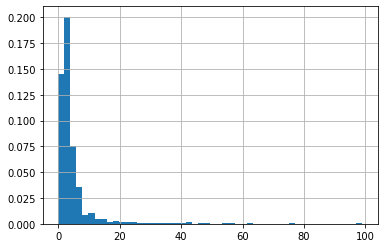

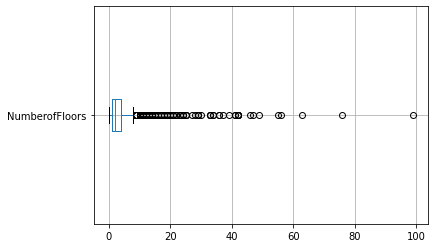

PropertyGFATotal
moy:
 118411.57635613208
med:
 49250.5
mod:
 0    21600.0
dtype: float64
var:
 87185556111.03029
ect:
 295272.0036018151
skw:
 19.22866426667273
kur:
 561.1592228835243


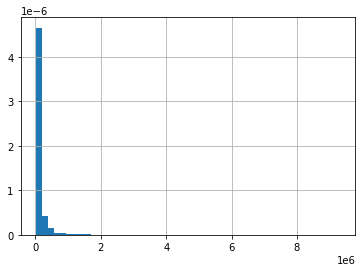

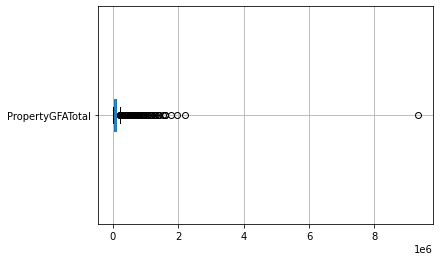

LargestPropertyUseTypeGFA
moy:
 98185.72906839622
med:
 43086.0
mod:
 0    0.0
dtype: float64
var:
 75607574713.55586
ect:
 274968.3158357629
skw:
 23.25073513719044
kur:
 749.4352754889353


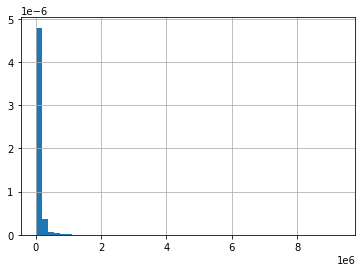

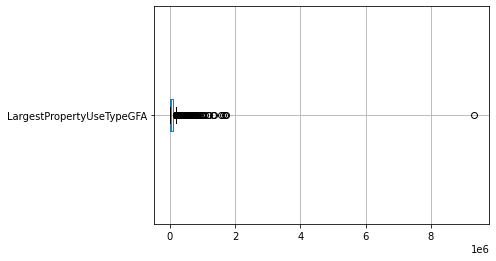

SecondLargestPropertyUseTypeGFA
moy:
 18959.027799787735
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 2816546873.5928116
ect:
 53071.14916404968
skw:
 5.6448093275417754
kur:
 43.04113132205658


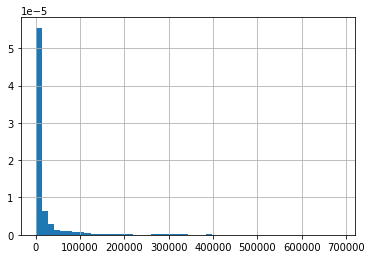

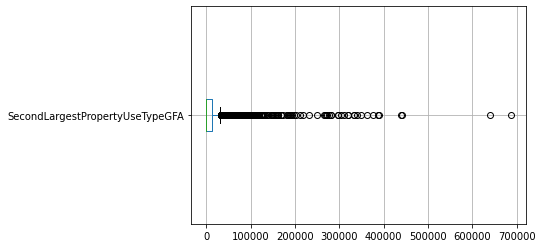

ThirdLargestPropertyUseTypeGFA
moy:
 3132.994869952535
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 316542912.3807983
ect:
 17791.652885013194
skw:
 15.661142451908562
kur:
 327.10490017630514


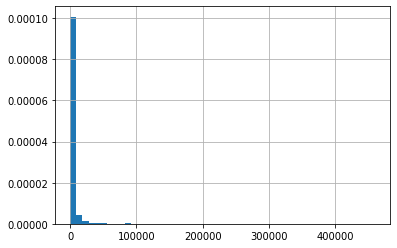

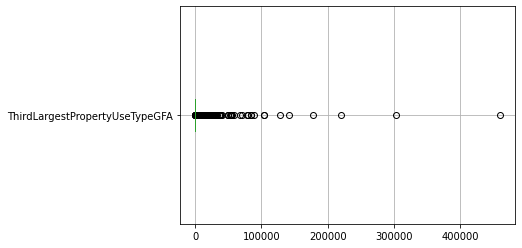

ENERGYSTARScore
moy:
 64.93842150910667
med:
 72.5
mod:
 0    100.0
dtype: float64
var:
 786.1124266497368
ect:
 28.037696528954314
skw:
 -0.7547797750292722
kur:
 -0.5196387540232386


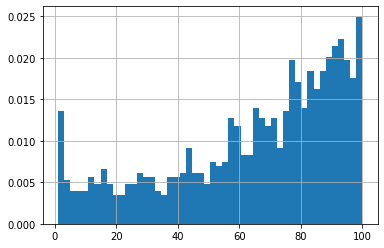

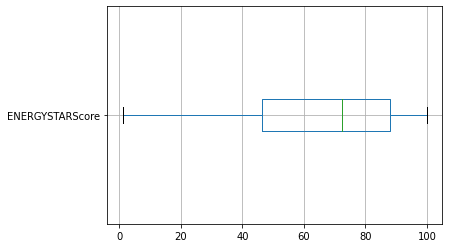

SiteEUI(kBtu/sf)
moy:
 72.11500593281279
med:
 51.7000005725
mod:
 0    61.0
dtype: float64
var:
 5400.692465579977
ect:
 73.48940376394393
skw:
 3.766400504683707
kur:
 22.612061132242985


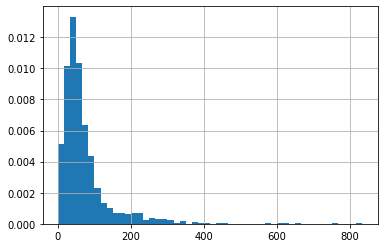

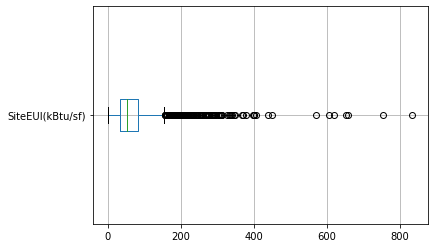

SourceEUI(kBtu/sf)
moy:
 176.28673349751975
med:
 131.749999225
mod:
 0    128.350002
dtype: float64
var:
 33776.391069014215
ect:
 183.78354406478894
skw:
 4.982013536341477
kur:
 44.82045241266133


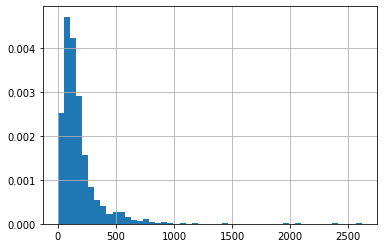

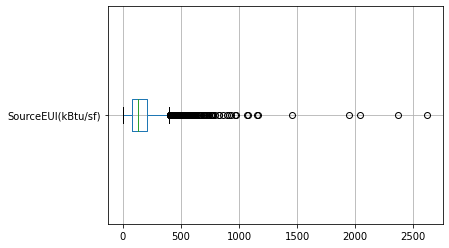

SiteEnergyUse(kBtu)
moy:
 8459876.551897023
med:
 2551749.5625
mod:
 0       0.000000e+00
1       1.697945e+04
2       3.402425e+04
3       3.420975e+04
4       5.526710e+04
            ...     
1691    2.797747e+08
1692    2.891500e+08
1693    2.944517e+08
1694    4.483853e+08
1695    8.739237e+08
Length: 1696, dtype: float64
var:
 906229458615642.6
ect:
 30103645.271223262
skw:
 17.99157463618652
kur:
 445.0342841571296


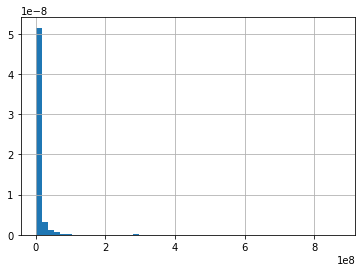

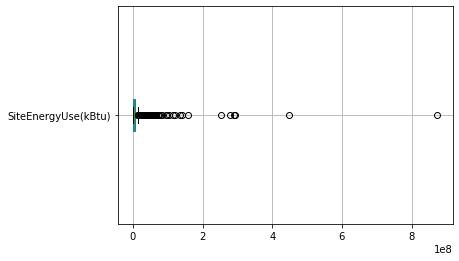

SteamUse(kBtu)
moy:
 513615.88628236443
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 28641318835106.445
ect:
 5351758.4806404
skw:
 19.209054442360742
kur:
 416.91520168514785


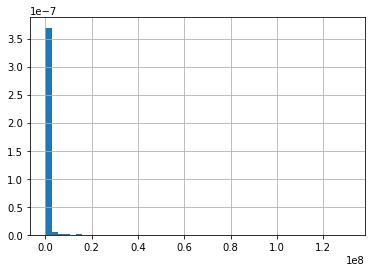

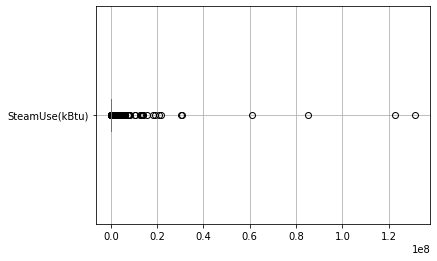

Electricity(kWh)
moy:
 1719460.4245700848
med:
 482721.101575
mod:
 0       2.000000e+00
1       2.449950e+03
2       2.630750e+03
3       4.976200e+03
4       9.971950e+03
            ...     
1691    4.100195e+07
1692    4.410208e+07
1693    4.976086e+07
1694    8.195296e+07
1695    1.925775e+08
Length: 1696, dtype: float64
var:
 36778000408421.016
ect:
 6064486.821522578
skw:
 20.852835660552923
kur:
 601.3938179843342


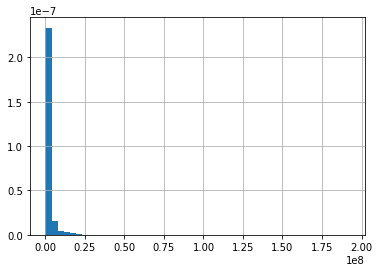

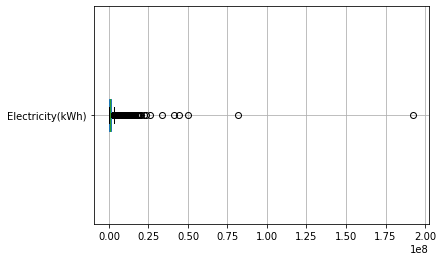

NaturalGas(kBtu)
moy:
 1972968.3950694574
med:
 497954.25
mod:
 0    0.0
dtype: float64
var:
 88374594656082.42
ect:
 9400776.279440034
skw:
 21.650715761702685
kur:
 613.3256246351807


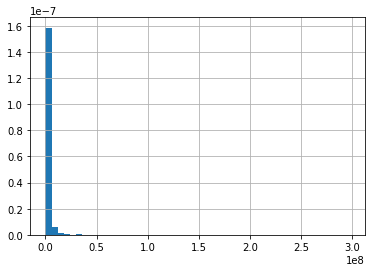

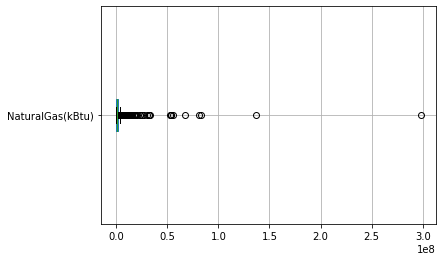

GHGEmissions(MetricTonsCO2e)
moy:
 185.3290566037736
med:
 50.2675
mod:
 0      0.240
1      0.790
2      1.560
3      3.620
4      3.730
5      6.860
6      9.145
7      9.585
8     16.645
9     17.665
10    21.105
11    22.660
12    23.660
13    24.055
14    30.485
15    36.205
16    50.405
17    65.515
18    71.060
dtype: float64
var:
 555811.9439759674
ect:
 745.5279632421358
skw:
 14.115806020373842
kur:
 246.8318978382579


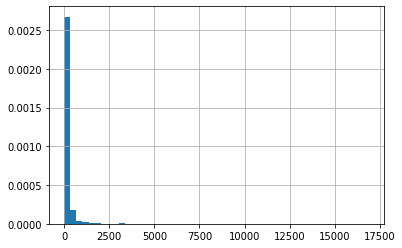

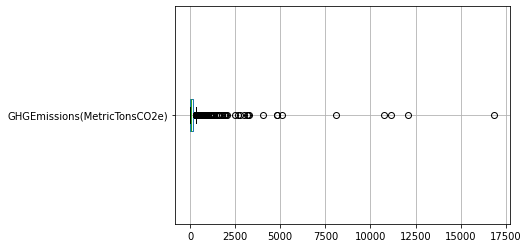

GHGEmissionsIntensity(kgCO2e/ft2)
moy:
 1.502532429245283
med:
 0.7875
mod:
 0    0.19
dtype: float64
var:
 5.136749232438909
ect:
 2.2664397703091317
skw:
 4.785726599139725
kur:
 39.88121092614859


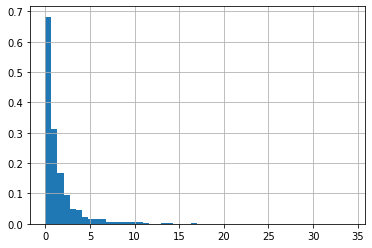

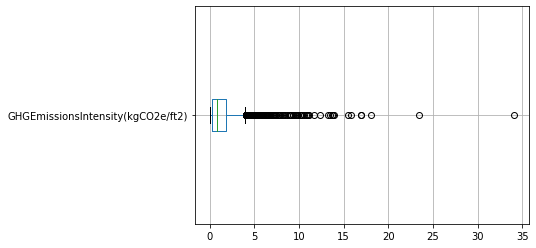

BuildingAge
moy:
 54.295400943396224
med:
 51.0
mod:
 0    116
dtype: int64
var:
 1078.4887996033954
ect:
 32.840353219833
skw:
 0.28347995947703536
kur:
 -1.0584642399878992


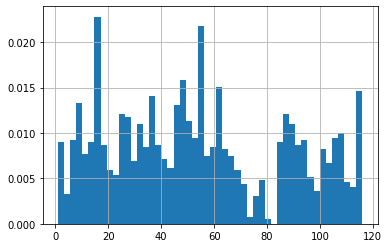

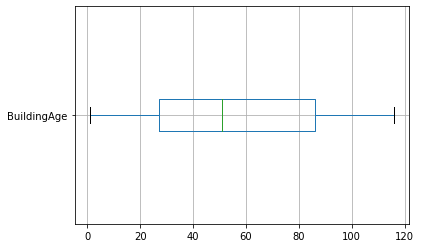

GFABuilding
moy:
 0.9373968163694284
med:
 1.0
mod:
 0    1.0
dtype: float64
var:
 0.019362168262015034
ect:
 0.13914800847304654
skw:
 -2.5506634943383584
kur:
 7.66478627432698


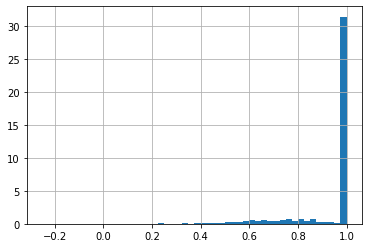

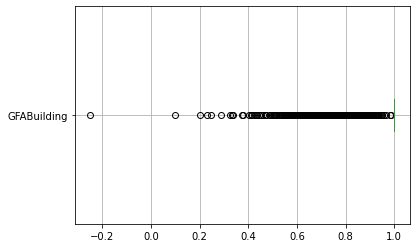

GFAParking
moy:
 0.06260318363057171
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 0.019362168262015034
ect:
 0.13914800847304654
skw:
 2.5506634943383566
kur:
 7.664786274326971


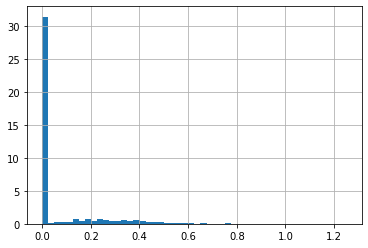

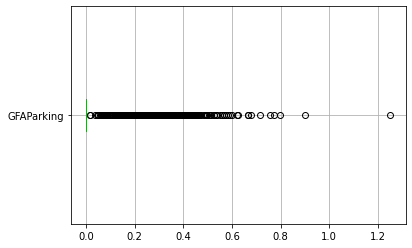

<IPython.core.display.Javascript object>

In [16]:
# Je réalise une analyse univarié de toutes les variables quantitatives.

for c in data.columns:
    if c in [
        "BuildingAge",
        "PropertyGFATotal",
        "LargestPropertyUseTypeGFA",
        "GFABuilding",
        "NumberofFloors",
        "SecondLargestPropertyUseTypeGFA",
        "ThirdLargestPropertyUseTypeGFA",
        "ENERGYSTARScore",
        "SiteEUI(kBtu/sf)",
        "SourceEUI(kBtu/sf)",
        "SiteEnergyUse(kBtu)",
        "SteamUse(kBtu)",
        "Electricity(kWh)",
        "NaturalGas(kBtu)",
        "GFAParking",
        "GHGEmissions(MetricTonsCO2e)",
        "GHGEmissionsIntensity(kgCO2e/ft2)",
    ]:
        subset = data[c]  # Création du sous-échantillon
        print(c)
        print("moy:\n", subset.mean())
        print("med:\n", subset.median())
        print("mod:\n", subset.mode())
        print("var:\n", subset.var(ddof=0))
        print("ect:\n", subset.std(ddof=0))
        print("skw:\n", subset.skew())
        print("kur:\n", subset.kurtosis())
        subset.hist(density=True, bins=50)  # Crée l'histogramme
        plt.show()  # Affiche l'histogramme
        data.boxplot(column=c, vert=False)
        plt.show()

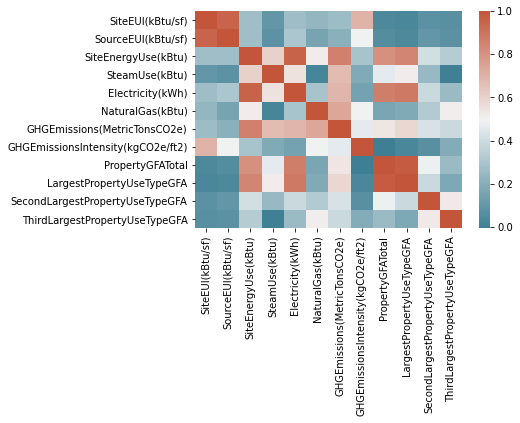

<IPython.core.display.Javascript object>

In [17]:
# Regardons dans un premier temps, toutes les corrélations entre les variables.

data_map = data[
    [
        "SiteEUI(kBtu/sf)",
        "SourceEUI(kBtu/sf)",
        "SiteEnergyUse(kBtu)",
        "SteamUse(kBtu)",
        "Electricity(kWh)",
        "NaturalGas(kBtu)",
        "GHGEmissions(MetricTonsCO2e)",
        "GHGEmissionsIntensity(kgCO2e/ft2)",
        "PropertyGFATotal",
        "LargestPropertyUseTypeGFA",
        "SecondLargestPropertyUseTypeGFA",
        "ThirdLargestPropertyUseTypeGFA",
    ]
]

cmap = sns.diverging_palette(220, 20, as_cmap=True)
ax = sns.heatmap(data_map.corr(method="pearson", min_periods=1), cmap=cmap)

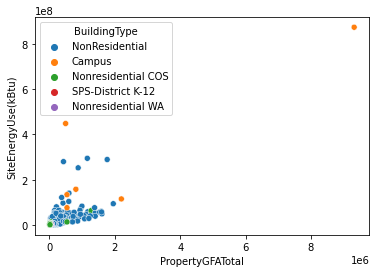

<IPython.core.display.Javascript object>

In [18]:
# Faisons une analyse bivarié des deux variables qui nous interessent pour la suite, SiteEnergyUse et GHGEmissions(MetricTonsCO2e)

sns.scatterplot(data=data, x="PropertyGFATotal", y="SiteEnergyUse(kBtu)", hue="BuildingType")
plt.show()

In [19]:
# Grâce à cette étude, nous pouvons remarquer qu'il existe un batiment Campus qui semble trés eloigné des autres.
# Il s'agit dans doute une valeur atypique, j'ai choisi de ne pas la considérer pour la suite.

data = data[data["SiteEnergyUse(kBtu)"] < 8 * 10 ** 8]

<IPython.core.display.Javascript object>

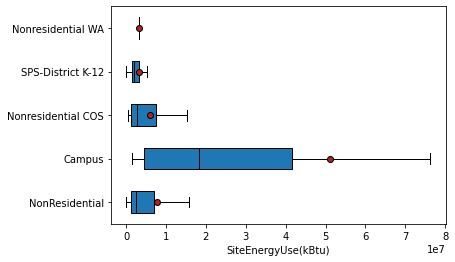

<IPython.core.display.Javascript object>

In [20]:
X = "BuildingType"  # qualitative
Y = "SiteEnergyUse(kBtu)"  # quantitative


modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X] == m][Y])

# Propriétés graphiques (pas très importantes)
medianprops = {"color": "black"}
meanprops = {"marker": "o", "markeredgecolor": "black", "markerfacecolor": "firebrick"}

plt.boxplot(
    groupes,
    labels=modalites,
    showfliers=False,
    medianprops=medianprops,
    vert=False,
    patch_artist=True,
    showmeans=True,
    meanprops=meanprops,
)

plt.xlabel("SiteEnergyUse(kBtu)")

plt.show()

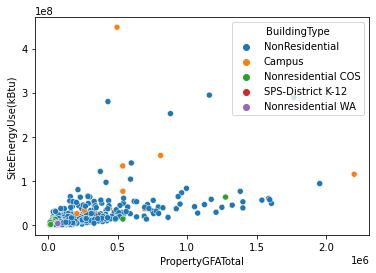

<IPython.core.display.Javascript object>

In [21]:
sns.scatterplot(
    data=data, x="PropertyGFATotal", y="SiteEnergyUse(kBtu)", hue="BuildingType"
)
plt.show()

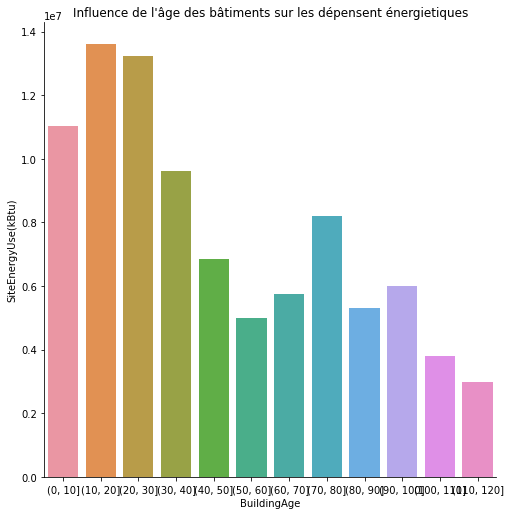

<IPython.core.display.Javascript object>

In [22]:
bins = pd.IntervalIndex.from_tuples(
    [
        (0, 10),
        (10, 20),
        (20, 30),
        (30, 40),
        (40, 50),
        (50, 60),
        (60, 70),
        (70, 80),
        (80, 90),
        (90, 100),
        (100, 110),
        (110, 120),
    ]
)

sns.catplot(
    data=data,
    kind="bar",
    x=pd.cut(data["BuildingAge"], bins=bins),
    y="SiteEnergyUse(kBtu)",
    ci=None,
    height=7,
)
plt.title("Influence de l'âge des bâtiments sur les dépensent énergietiques")
plt.show()

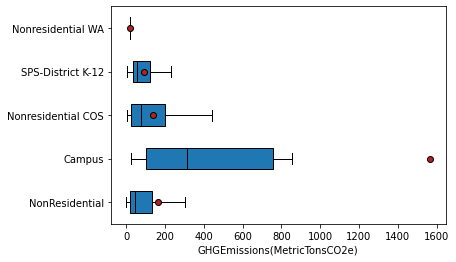

<IPython.core.display.Javascript object>

In [23]:
X = "BuildingType"  # qualitative
Y = "GHGEmissions(MetricTonsCO2e)"  # quantitative


modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X] == m][Y])

# Propriétés graphiques (pas très importantes)
medianprops = {"color": "black"}
meanprops = {"marker": "o", "markeredgecolor": "black", "markerfacecolor": "firebrick"}

plt.boxplot(
    groupes,
    labels=modalites,
    showfliers=False,
    medianprops=medianprops,
    vert=False,
    patch_artist=True,
    showmeans=True,
    meanprops=meanprops,
)

plt.xlabel("GHGEmissions(MetricTonsCO2e)")

plt.show()

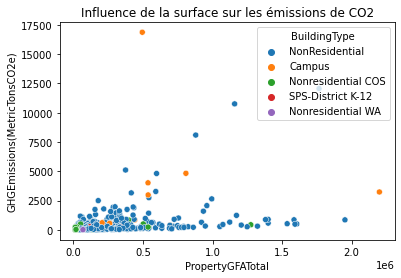

<IPython.core.display.Javascript object>

In [24]:
sns.scatterplot(
    data=data,
    x="PropertyGFATotal",
    y="GHGEmissions(MetricTonsCO2e)",
    hue="BuildingType",
)
plt.title("Influence de la surface sur les émissions de CO2")
plt.show()

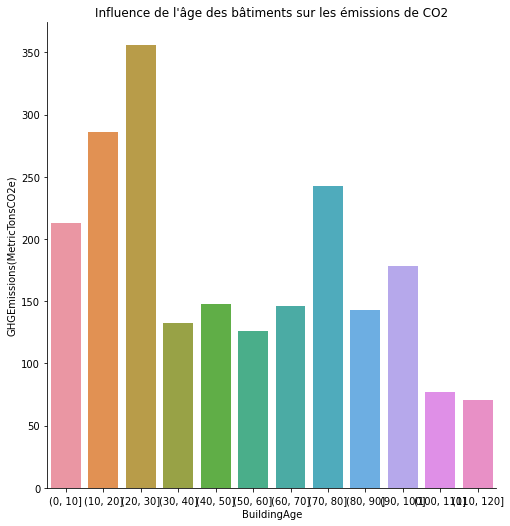

<IPython.core.display.Javascript object>

In [25]:
bins = pd.IntervalIndex.from_tuples(
    [
        (0, 10),
        (10, 20),
        (20, 30),
        (30, 40),
        (40, 50),
        (50, 60),
        (60, 70),
        (70, 80),
        (80, 90),
        (90, 100),
        (100, 110),
        (110, 120),
    ]
)

sns.catplot(
    data=data,
    kind="bar",
    x=pd.cut(data["BuildingAge"], bins=bins),
    y="GHGEmissions(MetricTonsCO2e)",
    ci=None,
    height=7,
)
plt.title("Influence de l'âge des bâtiments sur les émissions de CO2")
plt.show()

In [26]:
# Je vais maintenant séparé mes données en deux dataset. Je vais dans un premier temps supprimer toutes les données Outliers,
# Defaultdata et ComplianceStatut. Je les garde dans un deuxième dataset pour pouvoir, une fois notre modèle sélectionné
# voir leurs influences sur les résultats.

data_wo = data

data.drop(data[data["Outlier"] == "High Outlier"].index, inplace=True)
data.drop(data[data["Outlier"] == "Low Outlier"].index, inplace=True)
data.drop(data[data["Outlier"] == "High outlier"].index, inplace=True)
data.drop(data[data["Outlier"] == "Low outlier"].index, inplace=True)
data.drop(data[data["DefaultData"] == "Yes"].index, inplace=True)
data = data[data["DefaultData"].notna()]
data.drop(data[data["DefaultData"] == True].index, inplace=True)
data = data[data["ComplianceStatus"] == "Compliant"]

<IPython.core.display.Javascript object>

In [26]:
# Enregistrement au format CSV
data.to_csv("data_nettoyees.csv",index=False)
data.to_csv("data_wo.csv",index=False)